In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Amazon Sales data.csv')

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
# checking data
df.shape  # 100 rows, 14 columns
df.info()  # 11 kb
print('')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB



,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
# checking for inconsistency:
df.duplicated().sum()  # 0
df.isnull().sum()  # 0

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
df.sample(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
42,Sub-Saharan Africa,The Gambia,Cereal,Offline,H,6/7/2012,994022214,6/8/2012,2117,205.70,117.11,435466.90,247921.87,187545.03
19,Australia and Oceania,East Timor,Meat,Online,L,7/31/2012,322067916,9/11/2012,5908,421.89,364.69,2492526.12,2154588.52,337937.60
64,Central America and the Caribbean,Haiti,Cosmetics,Offline,H,10/13/2013,505716836,11/16/2013,1705,437.20,263.33,745426.00,448977.65,296448.35


In [ ]:
mask = df['Order Date'].str.split('/').apply(lambda x: x[2])
np.sort(mask.unique())

array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype=object)

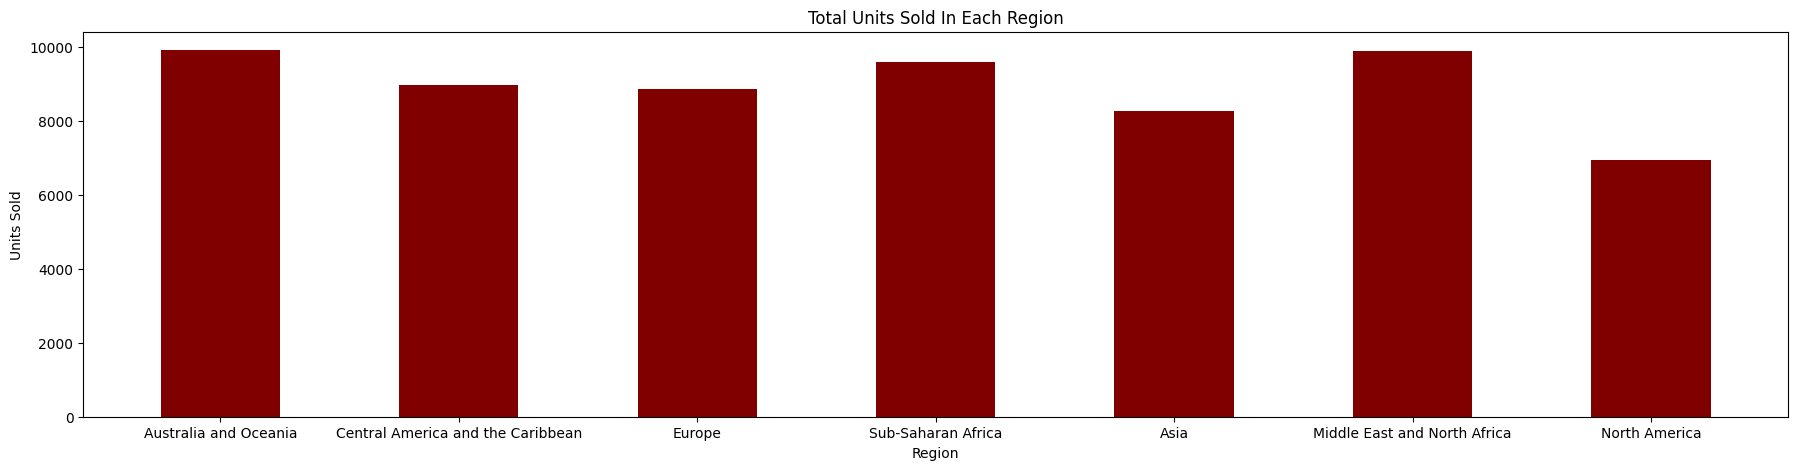

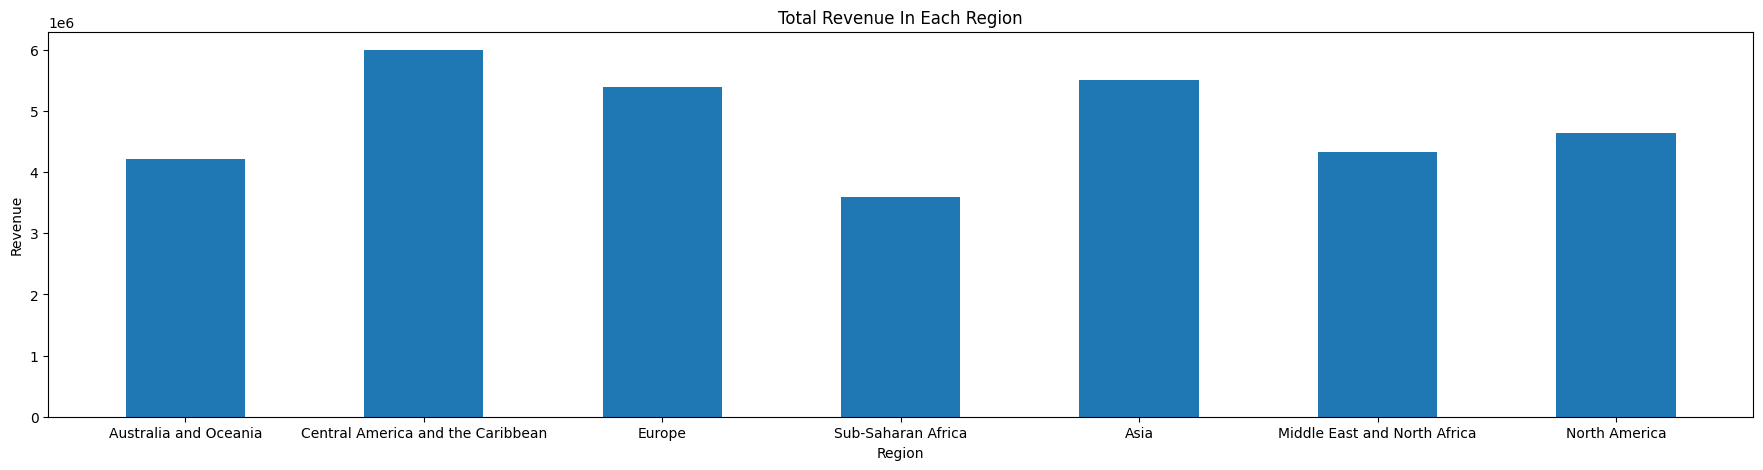

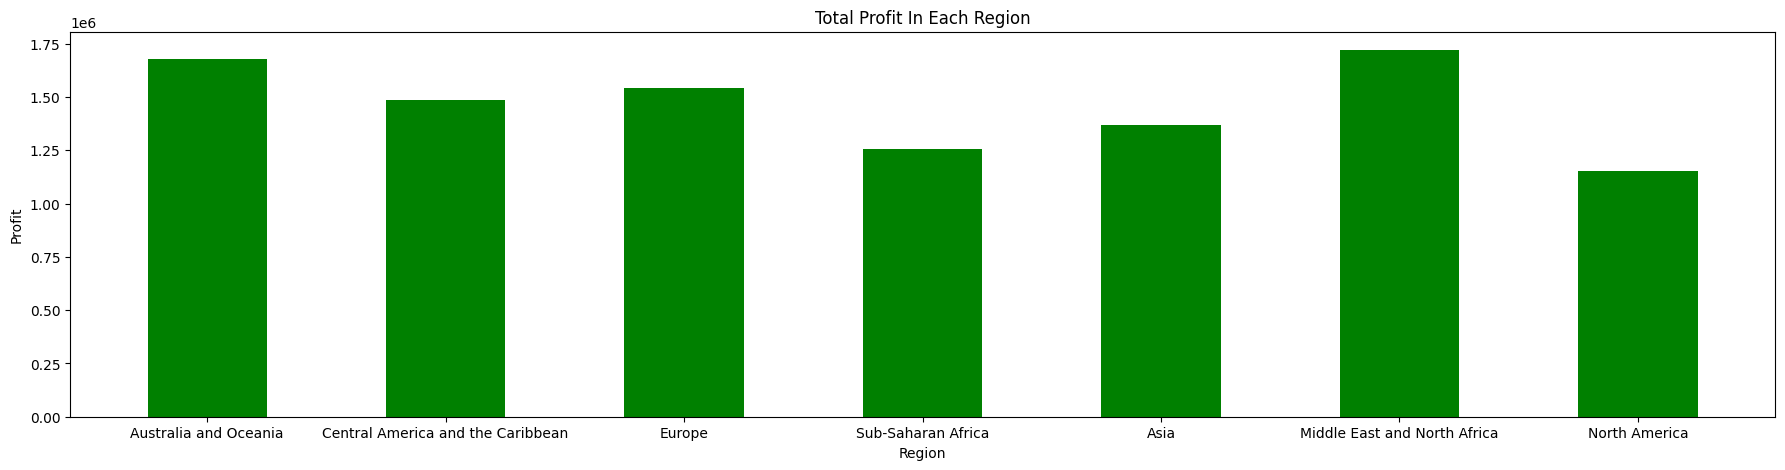

In [ ]:
# visualization

# Region and Units Sold
fig = plt.figure(figsize = (22, 5))
plt.bar(df.Region, df['Units Sold'], color ='maroon', width = 0.5)

plt.xlabel("Region")
plt.ylabel("Units Sold")
plt.title("Total Units Sold In Each Region")
plt.show()

# Region and Revenue
fig = plt.figure(figsize = (22, 5))
plt.bar(df.Region, df['Total Revenue'], width = 0.5)

plt.xlabel("Region")
plt.ylabel("Revenue")
plt.title("Total Revenue In Each Region")
plt.show()

# Region and Profit
fig = plt.figure(figsize = (22, 5))
plt.bar(df.Region, df['Total Profit'], color ='Green', width = 0.5)

plt.xlabel("Region")
plt.ylabel("Profit")
plt.title("Total Profit In Each Region")
plt.show()

In [ ]:
# Countries with max units sold
x = df['Units Sold'].sort_values(ascending=False)[:5]
units = df[df.index.isin(x.index)]

# Countries with max revenue
x = df['Total Revenue'].sort_values(ascending=False)[:5]
revenue = df[df.index.isin(x.index)]

# Countries with max profit
x = df['Total Profit'].sort_values(ascending=False)[:5]
profit = df[df.index.isin(x.index)]

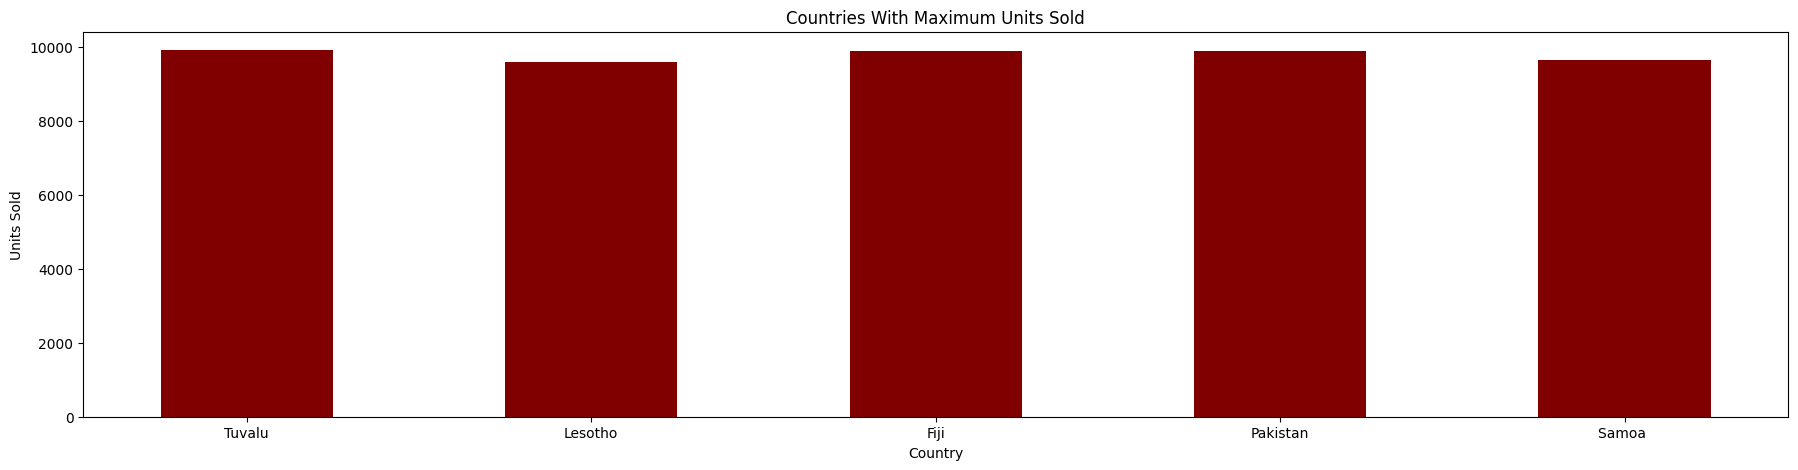

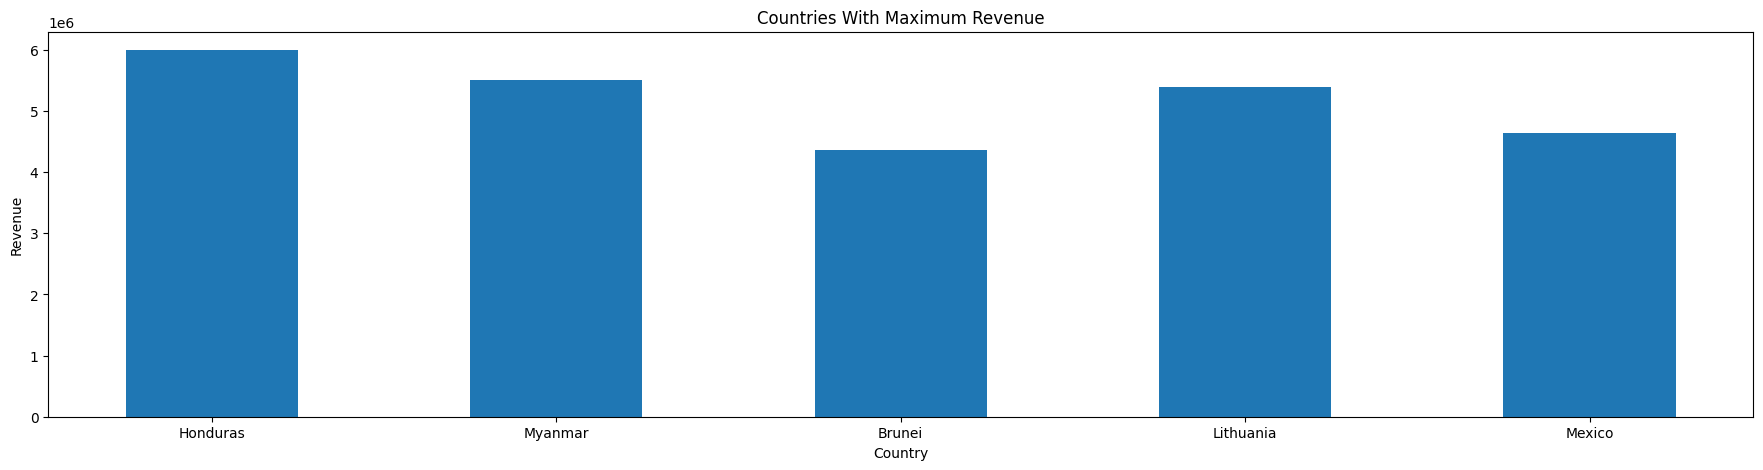

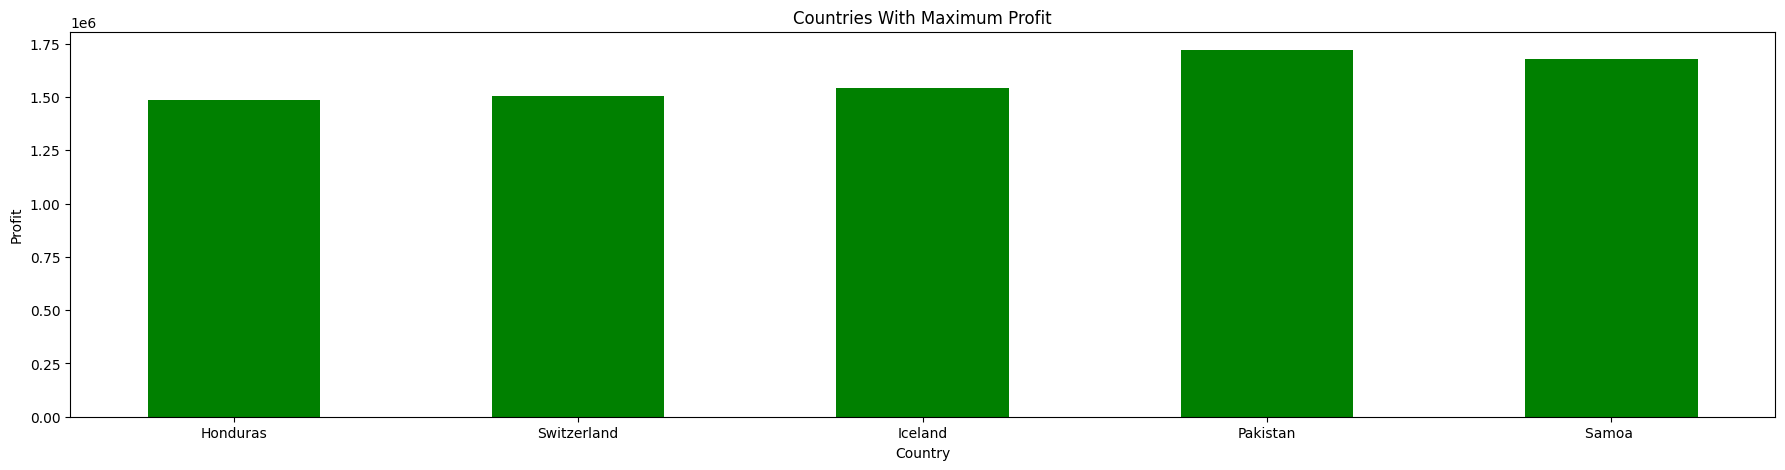

In [ ]:
# Country and Units Sold
fig = plt.figure(figsize = (22, 5))
plt.bar(units.Country, units['Units Sold'], color ='maroon', width = 0.5)

plt.xlabel("Country")
plt.ylabel("Units Sold")
plt.title("Countries With Maximum Units Sold")
plt.show()

# Country and Revenue
fig = plt.figure(figsize = (22, 5))
plt.bar(revenue.Country, revenue['Total Revenue'], width = 0.5)

plt.xlabel("Country")
plt.ylabel("Revenue")
plt.title("Countries With Maximum Revenue")
plt.show()

# Country and Profit
fig = plt.figure(figsize = (22, 5))
plt.bar(profit.Country, profit['Total Profit'], color ='Green', width = 0.5)

plt.xlabel("Country")
plt.ylabel("Profit")
plt.title("Countries With Maximum Profit")
plt.show()

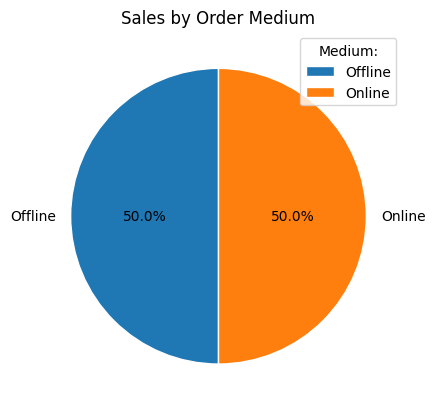

In [ ]:
# Sales Order Medium
plt.pie(df['Sales Channel'].value_counts(), labels = df['Sales Channel'].unique(), startangle = 90,
        autopct = '%1.1f%%', pctdistance = 0.5,
        wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title("Sales by Order Medium")
plt.legend(title = 'Medium:')
plt.show()

In [ ]:
df['Item Type'].value_counts()

Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: Item Type, dtype: int64